### CUSTOMER SEGMENTATION ANALYSIS

This project demonstrated how KMeans clustering can be utilized to uncover trends in business through its customers' behavior.

In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Import the dataset

df = pd.read_csv("Mall_Customers.csv")

### Exploratory Data Analysis

This is where I learn about the data.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.drop(["CustomerID"], axis = 1, inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In this code, a figure with three subplots is created using Matplotlib. Each subplot represents the distribution of a specific feature ('Age', 'Annual Income (k$)', and 'Spending Score (1-100)') from the DataFrame df. The Seaborn library is used to plot a distribution plot (distplot) for each feature, with 20 bins to visualize the data distribution. 

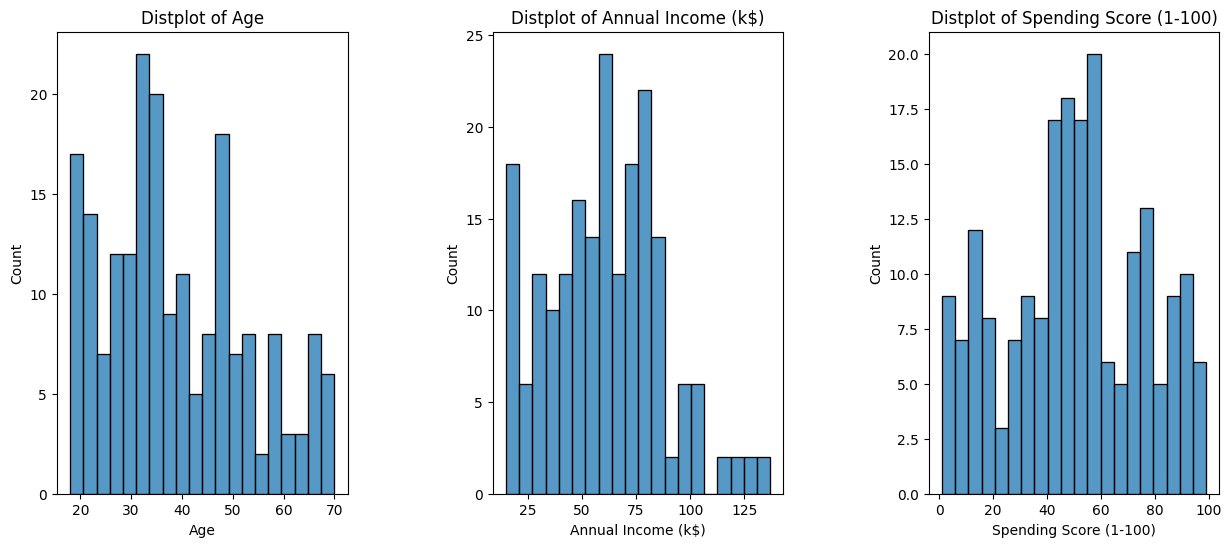

In [10]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

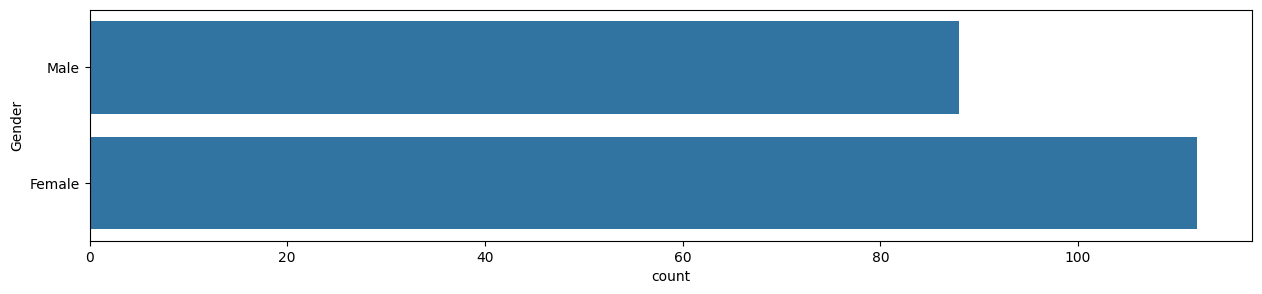

In [11]:
plt.figure(figsize = (15, 3))
sns.countplot(y = 'Gender', data = df)
plt.show()

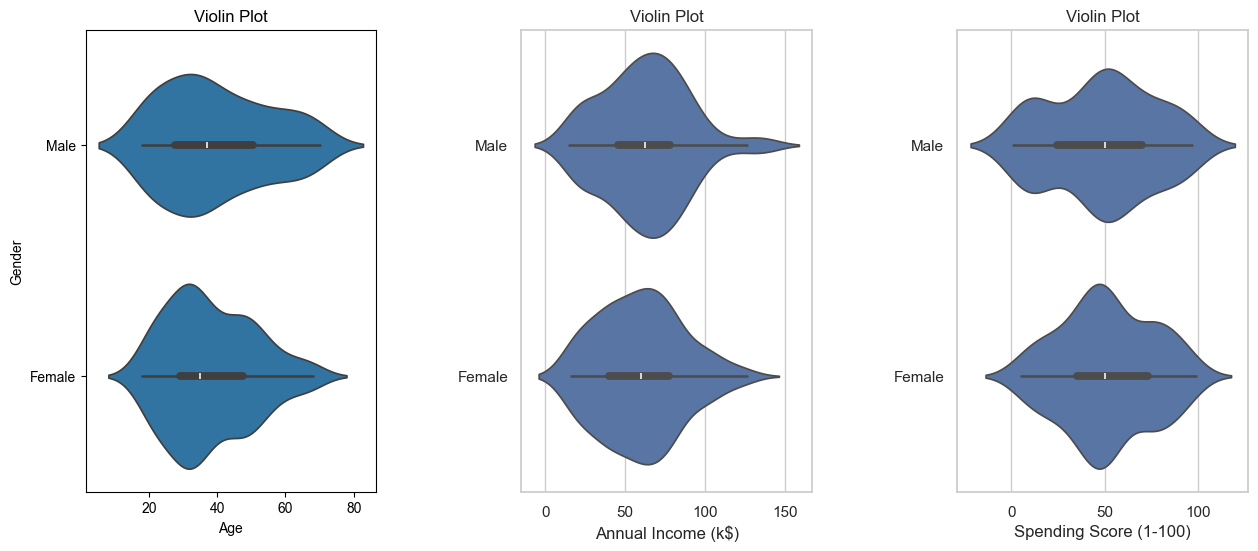

In [12]:
plt.figure(1, figsize=(15, 6))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style = "whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()

In [13]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

In [14]:
agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

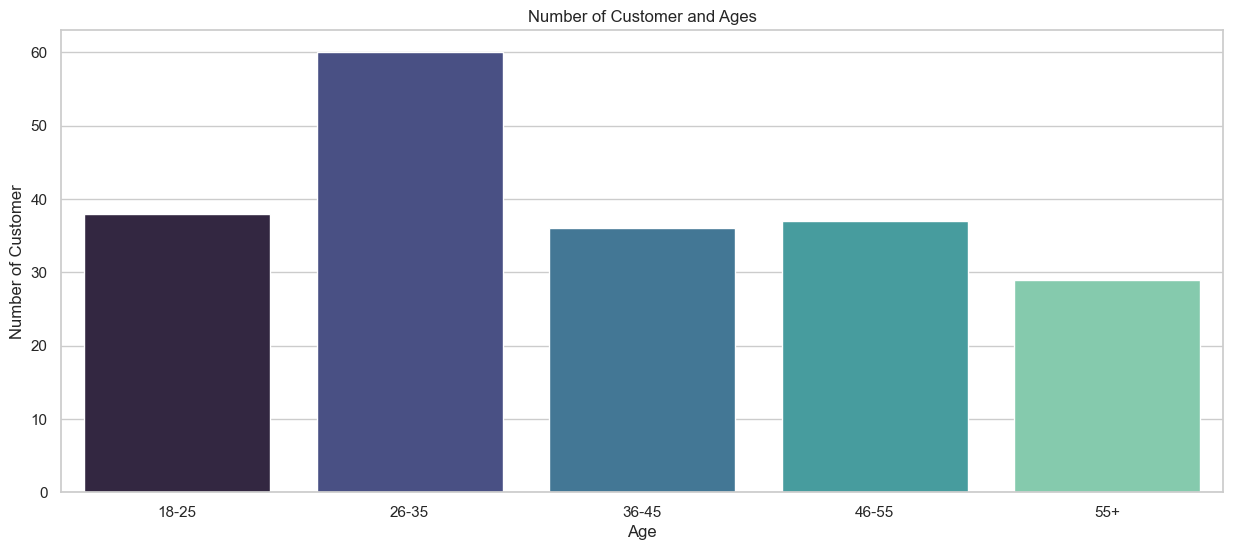

In [15]:
plt.figure(figsize = (15, 6))
sns.barplot(x=agex, y=agey, hue=agex, palette='mako', legend=False)
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

#### Let’s also create a relation plot between the ‘Annual Income’ column and ‘Spending Score’ column.



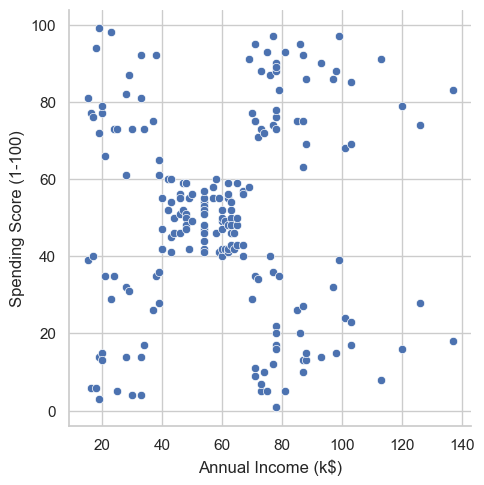

In [16]:
sns.relplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df)

In [17]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 100)]

In [18]:
ssx = ["1-20", "21-40", "41-60", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_100.values)]

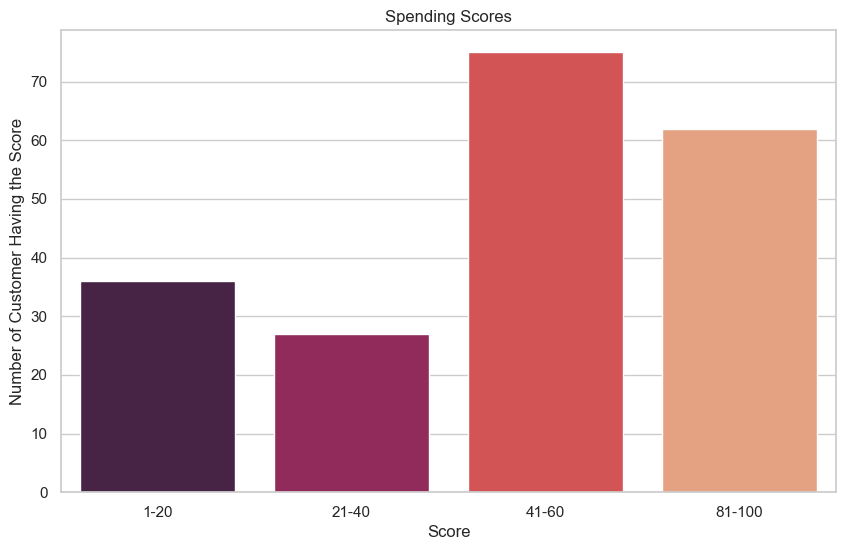

In [19]:
plt.figure(figsize = (10, 6))
sns.barplot(x = ssx, y = ssy,  hue= ssx, palette = "rocket", legend=False) 
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

In [20]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

In [21]:
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60 .values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

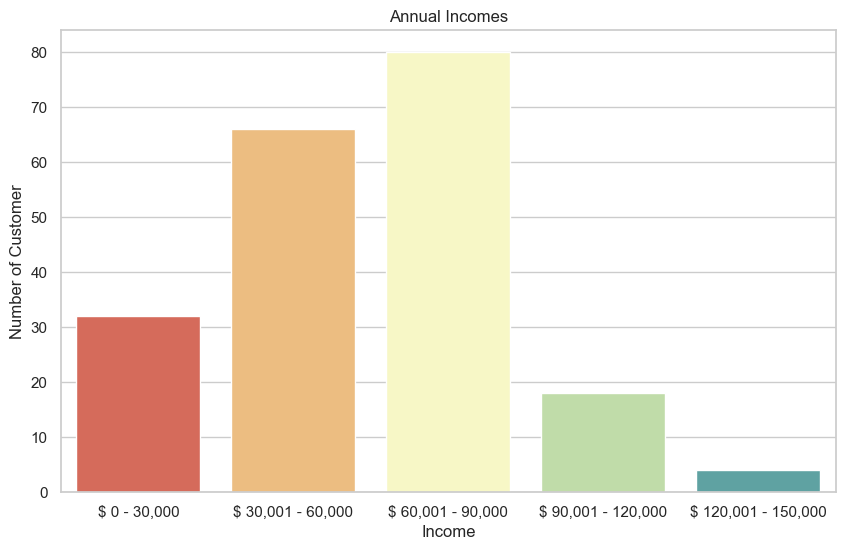

In [22]:
plt.figure(figsize = (10, 6))
sns.barplot(x = aix, y = aiy, hue = aix, palette = "Spectral", legend = False)
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

#### Creating Clusters

Now let’s start creating clusters for different columns of the dataset and perform k-means clustering and also visualize it.

FirstIwe will create a cluster for ‘Age’ and ‘Spending Score’ columns.
So first let’s find the number of clusters:

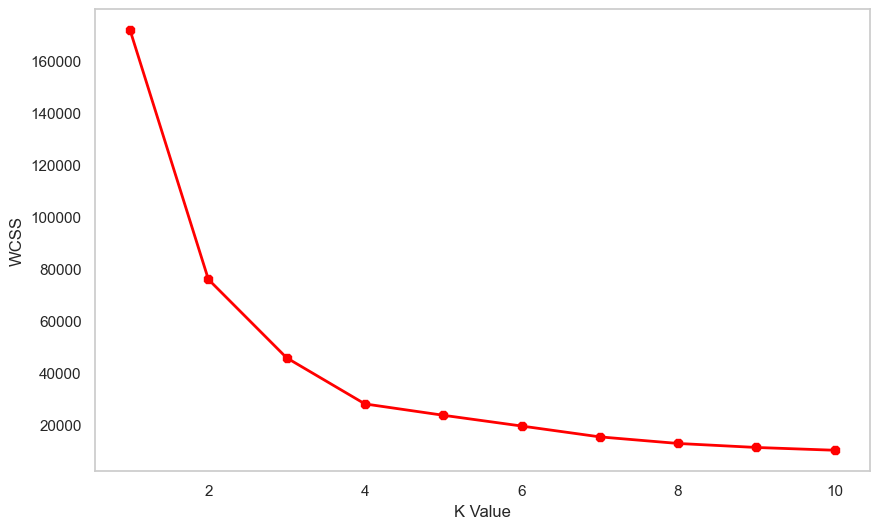

In [35]:
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### Fit that clusters into KMeans model and predict labels, and also find centroids

In [24]:
kmeans = KMeans(n_clusters = 4, n_init=10)

label = kmeans.fit_predict(X1)

print(label)

[0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 0 1 2 0 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1
 2 1 2 3 2 3 0 1 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 3 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 3 2
 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [25]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


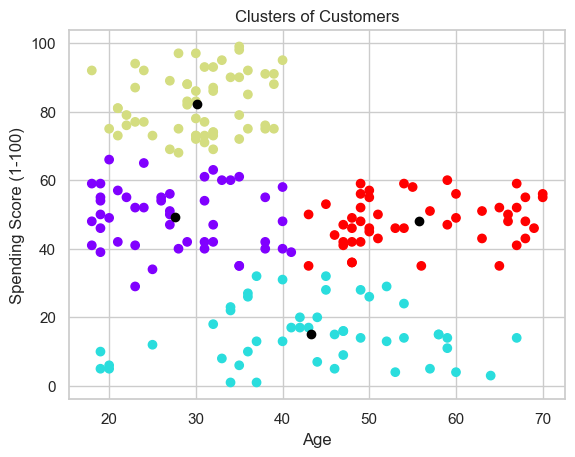

In [26]:
# Visualize the clusters (basically different groups)

plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

#### Similarly, I perform same operations on different columns and visualize clusters of each:

Now I will find the cluster of ‘Annual Income’ and ‘Spending Score’ columns:

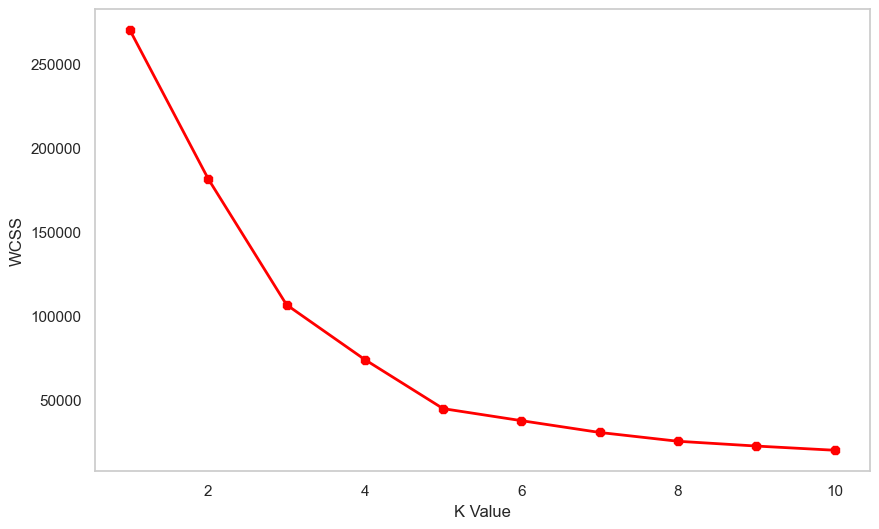

In [27]:
# Creating Clusters based on Annual Income and Spending Score:

X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### Let’s fit this into our KMeans algorithm and predict labels and also find centroids:

In [28]:
kmeans = KMeans(n_clusters = 5, n_init=10)

label = kmeans.fit_predict(X2)

print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 1 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [29]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


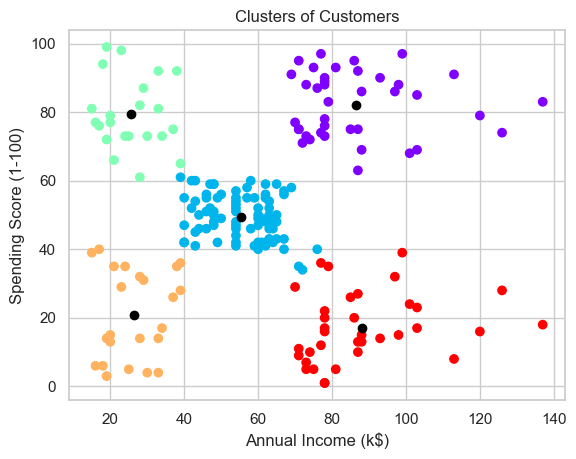

In [30]:
plt.scatter(X2[:,0], X1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

#### Now I will create a cluster for all the three columns that is ‘Age’, ‘Annual Income’, and ‘Spending Score’.

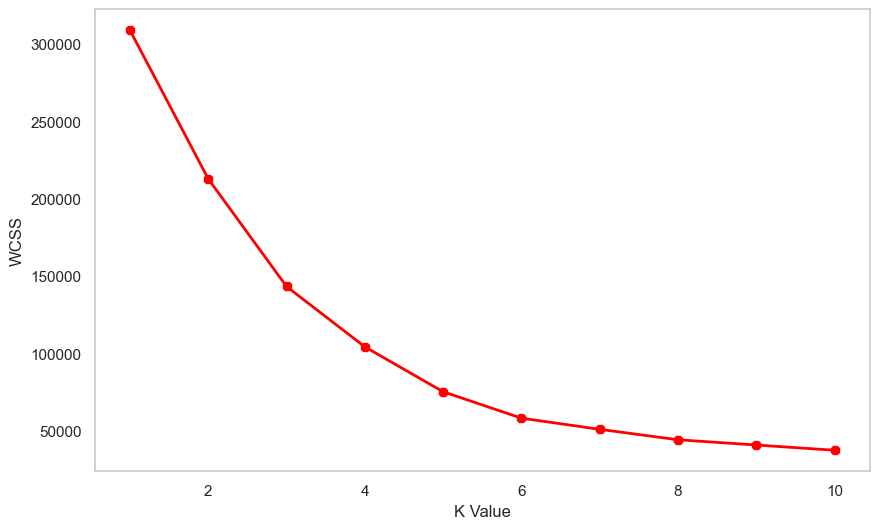

In [31]:
# Creating a Clusters based on Age, Annual Income, and Spending Score

X3 = df.iloc[:,1:]

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [32]:
# similarly as I have done above fit it and find centroids:

kmeans = KMeans(n_clusters = 6, n_init=10)

label = kmeans.fit_predict(X3)

print(label)

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 3 4 3 0 5 4 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 0 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [33]:
print(kmeans.cluster_centers_)

[[27.         56.65789474 49.13157895]
 [32.69230769 86.53846154 82.12820513]
 [41.68571429 88.22857143 17.28571429]
 [56.15555556 53.37777778 49.08888889]
 [25.27272727 25.72727273 79.36363636]
 [44.14285714 25.14285714 19.52380952]]


#### As in this step, we will create a 3D graph as there are three dimensions each dimension corresponding to one column. 

### Using mpl_toolkits, we will create a 3D graph.

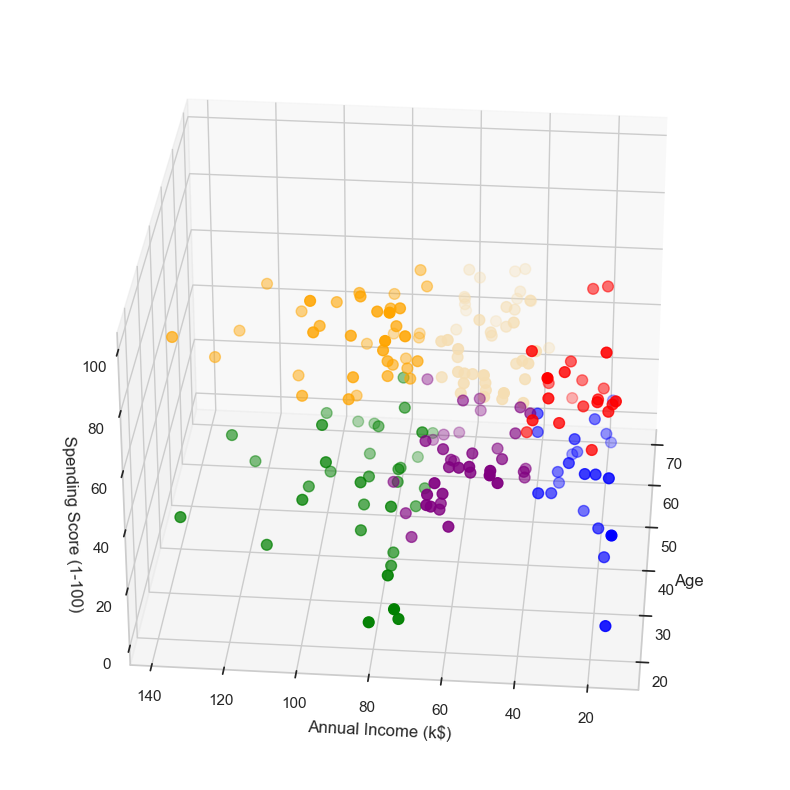

In [34]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c = "blue", s = 60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c = "red", s = 60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c = "green", s = 60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c = "orange", s = 60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c = "purple", s = 60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c = "wheat", s = 60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

#### In this graph, each color represents different features.

## Summary

#### In this machine learning project, I successfully created Segments of customers using the K-means clustering algorithm. I learned how to analyze the dataset in different ways, and also visualize the dataset to know the details of the dataset and find the relation between different columns. I also learned about K-means clustering and how to use it efficiently to create clusters and segment the data.